In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from IPython.display import Image
from IPython.core.display import HTML
from params import *
from fault_tree import *
from genetic_operators import *
from nsga2 import *

In [2]:
ind = generate_random_individual()

In [5]:
ind.crowding_distance = 0.5

In [6]:
print(ind.crowding_distance)

0.5


In [7]:
ind2 = mutation(ind)

In [8]:
print(ind2.crowding_distance)

0.5


In [15]:
def crossover_test(parent1, parent2):
    '''
    Perform crossover between two parents
    '''

    print(parent1.crowding_distance)
    # Create two children
    child1 = parent1.copy()
    child2 = parent2.copy()

    print(child1.crowding_distance)

    # Choose a random index
    idx = random.randint(0, len(parent1.genes)-1)

    # Swap the genes
    child1.genes[idx:], child2.genes[idx:] = child2.genes[idx:], child1.genes[idx:]

    # Update the fitness of the children
    child1.update_fitness()
    child2.update_fitness()

    return child1, child2

In [16]:
c1, c2 = crossover_test(ind, ind2)

0.5
None


In [17]:
print(c1.crowding_distance)

None


In [11]:
print(c2.crowding_distance)

None


In [91]:
pop = generate_random_population(10)

In [92]:
for ind in pop:
    print(ind.crowding_distance)

None
None
None
None
None
None
None
None
None
None


In [93]:
def crowding_distance_sort_test(population):
    '''
    Perform crowding distance sort on the population
    '''
    # Initialize the crowding distance
    crowding_distance = {}
    for p in range(len(population)):
        crowding_distance[p] = 0

    # Compute the crowding distance
    for m in range(2):
        sorted_population = sorted(population, key=lambda x: x.fitness[m])
        crowding_distance[0] = float('inf')
        sorted_population[0].crowding_distance = crowding_distance[0]
        crowding_distance[len(population) - 1] = float('inf')
        sorted_population[-1].crowding_distance = crowding_distance[len(population) - 1]
        for i in range(1, len(population) - 1):
            crowding_distance[i] += (sorted_population[i+1].fitness[m] - sorted_population[i-1].fitness[m]) / (sorted_population[-1].fitness[m] - sorted_population[0].fitness[m])
            sorted_population[i].crowding_distance = crowding_distance[i]

    return population

In [94]:
pop = crowding_distance_sort_test(pop)

0.24447339725533784
inf
0.46910129704237497
inf
0.1381601638234778
1.136166596345021
0.18720405388741798
0.11549266978719515
0.5006987736163048
0.38490239274885196


In [95]:
for ind in pop:
    print(ind.crowding_distance)

0.24447339725533784
inf
0.46910129704237497
inf
0.1381601638234778
1.136166596345021
0.18720405388741798
0.11549266978719515
0.5006987736163048
0.38490239274885196


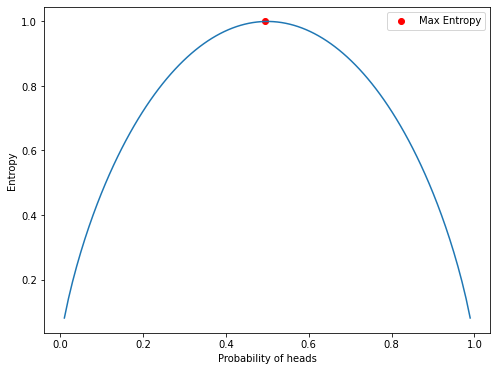

In [5]:
# Consider a coin toss with probability of heads varying from 0 to 1. Plot the entropy of the coin toss as a function of the probability of heads.

def entropy(p):
    '''
    Compute the entropy of a coin toss with probability of heads p
    '''
    return -(p*np.log2(p) + (1-p)*np.log2(1-p))

p = np.linspace(0.01, 0.99, 100)
ent = entropy(p)
max_ent_index = np.argmax(ent)

plt.figure(figsize=(8, 6))
plt.plot(p, ent)
plt.scatter(p[max_ent_index], ent[max_ent_index], color='red', label='Max Entropy')
plt.xlabel('Probability of heads')
plt.ylabel('Entropy')
plt.legend()


In [96]:
BREAK

NameError: name 'BREAK' is not defined

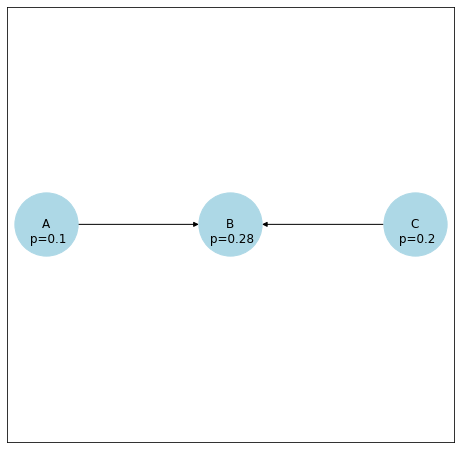

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with 3 nodes, A, B, C, with a V-structure A->B<-C
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C'])
G.add_edges_from([('A', 'B'), ('C', 'B')])

# Add the following probabilities A: 0.9, B: 0.7, C: 0.97
G.nodes['A']['p'] = 0.1
G.nodes['B']['p'] = 0.28
G.nodes['C']['p'] = 0.2

# Draw it properly with big nodes and A and C above B, showing the probabilities
pos = {'A': (0, 1), 'B': (1, 1), 'C': (2, 1)}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the graph
nx.draw_networkx(G, pos, node_size=4000, node_color='lightblue', with_labels=True, ax=ax)

# Add node labels with probabilities
node_labels = {node: f"\n\n p={G.nodes[node]['p']}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black', ax=ax)

# Show the figure
plt.show()



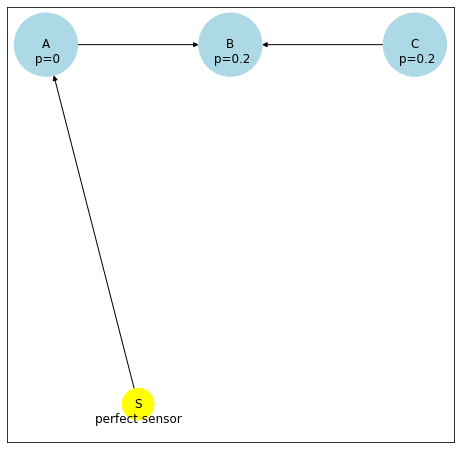

In [3]:
# Create a graph with 4 nodes, A, B, C, and S, with edges A->B<-C and S->A
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'S'])
G.add_edges_from([('A', 'B'), ('C', 'B'), ('S', 'A')])

# Add the following probabilities A: 0, B: 0.7, C: 0.97
G.nodes['A']['p'] = 0
G.nodes['B']['p'] = 0.2
G.nodes['C']['p'] = 0.2
G.nodes['S']['p'] = 0

# Set the label of node S to 'perfect sensor'
G.nodes['S']['label'] = 'perfect sensor'

# Draw it properly with big nodes and A and C above B, showing the probabilities
pos = {'A': (0, 1), 'B': (1, 1), 'C': (2, 1), 'S': (0.5, 0.5)}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the graph with smaller node size for S and yellow color for the sensor node
nx.draw_networkx(G, pos, node_size=[4000, 4000, 4000, 1000], node_color=['lightblue', 'lightblue', 'lightblue', 'yellow'], with_labels=True, ax=ax)

# Add node labels with probabilities
node_labels = {node: f"\n\n p={G.nodes[node]['p']}" for node in G.nodes}
node_labels['S'] = '\n\nperfect sensor'
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black', ax=ax)

# Show the figure
plt.show()

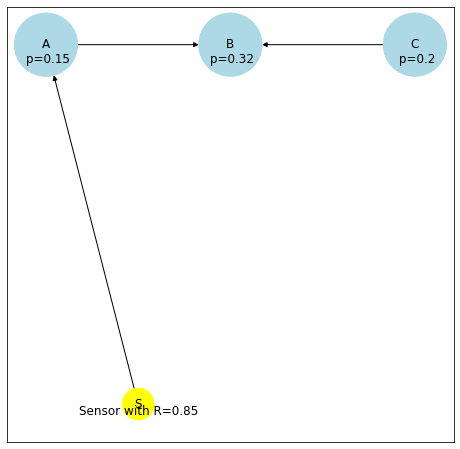

In [5]:
# Create a graph with 4 nodes, A, B, C, and S, with edges A->B<-C and S->A
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'S'])
G.add_edges_from([('A', 'B'), ('C', 'B'), ('S', 'A')])

# Add the following probabilities A: 0, B: 0.7, C: 0.97
G.nodes['A']['p'] = 0.15
G.nodes['B']['p'] = 0.32
G.nodes['C']['p'] = 0.2
G.nodes['S']['p'] = 0

# Set the label of node S to 'perfect sensor'
G.nodes['S']['label'] = 'perfect sensor'

# Draw it properly with big nodes and A and C above B, showing the probabilities
pos = {'A': (0, 1), 'B': (1, 1), 'C': (2, 1), 'S': (0.5, 0.5)}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the graph with smaller node size for S and yellow color for the sensor node
nx.draw_networkx(G, pos, node_size=[4000, 4000, 4000, 1000], node_color=['lightblue', 'lightblue', 'lightblue', 'yellow'], with_labels=True, ax=ax)

# Add node labels with probabilities
node_labels = {node: f"\n\n p={G.nodes[node]['p']}" for node in G.nodes}
node_labels['S'] = '\nSensor with R=0.85'
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black', ax=ax)

# Show the figure
plt.show()